In [ ]:
#QUESTION 01
#---------------------------------------------------------------------------
#---------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
num_classes = 4
dataset_path = "/kaggle/input/brain-tumors-256x256/Data"
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

model = models.Sequential()
model.add(layers.Input(shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
for _ in range(4):
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
for _ in range(4):
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
for _ in range(4):
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Found 2479 images belonging to 4 classes.
Found 617 images belonging to 4 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,586,628 (532.48 MB)

 Trainable params: 139,586,628 (532.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744995302.700446    1190 service.cc:148] XLA service 0x7920dc001f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744995302.700514    1190 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744995303.389193    1190 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1744995322.684086    1190 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  78/1000 ━━━━━━━━━━━━━━━━━━━━ 6:24 417ms/step - accuracy: 0.2601 - loss: 1.3915

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.2680 - loss: 1.3687 - val_accuracy: 0.2917 - val_loss: 1.3519
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2809 - loss: 1.3545 - val_accuracy: 0.2950 - val_loss: 1.3516
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2902 - loss: 1.3515 - val_accuracy: 0.2950 - val_loss: 1.3525
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.2865 - loss: 1.3516 - val_accuracy: 0.2917 - val_loss: 1.3525
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.2766 - loss: 1.3522 - val_accuracy: 0.2950 - val_loss: 1.3509
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.2851 - loss: 1.3519 - val_accuracy: 0.2950 - val_loss: 1.3504
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2772 - loss: 1.3522 - val_accuracy: 0.2950 - val_loss: 1.3518
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2925 - loss: 1.35

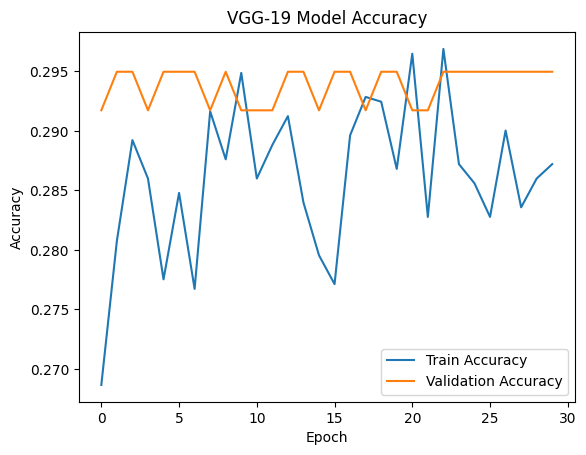

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=1000,
    epochs=30

)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG-19 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save("vgg19.keras")

**PART03**

In [ ]:

#Convolutional Layers: Extract spatial features like edges, textures, and tumor shapes.
#ReLU: Adds non-linearity, enabling the model to learn complex patterns.
#MaxPooling: Reduces spatial dimensions and computation, retains the most important features.
#Flatten: Converts the 3D features to 1D for fully connected layers.
#Fully Connected Layers: Learn high-level representations for classification.
#Softmax Layer: Outputs class probabilities.
# Why VGG-19 uses 3×3 filters:
#3×3 filters are small enough to reduce parameters but stacked deeply to maintain receptive field size.
#Enables capturing more complex features and reduces overfitting compared to larger filters.

**Question 02**



**PART01**

In [ ]:
#Dataset: brain-tumors-256x256

#Total Images: Depends on the number of files in all class folders.

#Classes:

#glioma_tumor

#meningioma_tumor

#pituitary_tumor

#normal

#Images: 256x256 pixel MRI scans of brain regions.

#Unique Feature: Includes all major types of brain tumors and non-tumor (normal) scans.

#train set 70% and validation set is 20%

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_path = '/kaggle/input/brain-tumors-256x256/Data'
img_size = (224, 224)
batch_size = 32
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_generator = train_val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2479 images belonging to 4 classes.
Found 617 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

def create_model(base_model, num_classes=4):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
vgg_model = create_model(VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
vgg_model.fit(train_generator, validation_data=val_generator, epochs=10,steps_per_epoch=1000)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4382 - loss: 1.2610 - val_accuracy: 0.6175 - val_loss: 1.0502
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5974 - loss: 0.9928 - val_accuracy: 0.7050 - val_loss: 0.8654
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6638 - loss: 0.8490 - val_accuracy: 0.6645 - val_loss: 0.8207
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6960 - loss: 0.7803 - val_accuracy: 0.7326 - val_loss: 0.7169
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7224 - loss: 0.7141 - val_accuracy: 0.7326 - val_loss: 0.7033
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7437 - loss: 0.6691 - val_accuracy: 0.7342 - val_loss: 0.6657
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7490 - loss: 0.6395 - val_accuracy: 0.7326 - val_loss: 0.6897
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7589 - loss: 0.6146 -

In [ ]:
resnet_model = create_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
resnet_model.fit(train_generator, validation_data=val_generator, epochs=10,steps_per_epoch=1000)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.3111 - loss: 1.4090 - val_accuracy: 0.3987 - val_loss: 1.2660
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3571 - loss: 1.2952 - val_accuracy: 0.3582 - val_loss: 1.2706
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3741 - loss: 1.2839 - val_accuracy: 0.4003 - val_loss: 1.2522
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3792 - loss: 1.2748 - val_accuracy: 0.4036 - val_loss: 1.2404
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3671 - loss: 1.2742 - val_accuracy: 0.4214 - val_loss: 1.2273
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3950 - loss: 1.2496 - val_accuracy: 0.4100 - val_loss: 1.2135
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3905 - loss: 1.2541 - val_accuracy: 0.4603 - val_loss: 1.2207
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4026 - loss: 1.2393 

In [ ]:
inception_model = create_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
inception_model.fit(train_generator, validation_data=val_generator, epochs=10,steps_per_epoch=1000)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.5920 - loss: 1.0364 - val_accuracy: 0.7131 - val_loss: 0.6801
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7389 - loss: 0.6595 - val_accuracy: 0.7666 - val_loss: 0.5802
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7737 - loss: 0.5669 - val_accuracy: 0.7877 - val_loss: 0.5378
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7931 - loss: 0.5088 - val_accuracy: 0.7974 - val_loss: 0.5192
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8168 - loss: 0.4765 - val_accuracy: 0.7844 - val_loss: 0.5075
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8238 - loss: 0.4394 - val_accuracy: 0.7909 - val_loss: 0.5002
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8344 - loss: 0.4206 - val_accuracy: 0.8006 - val_loss: 0.4988
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def evaluate_model(model, generator, name="Model"):
    predictions = model.predict(generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))
    acc = accuracy_score(y_true, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")
    return acc

vgg_acc = evaluate_model(vgg_model, val_generator, "VGG16")
resnet_acc = evaluate_model(resnet_model, val_generator, "ResNet50")
inception_acc = evaluate_model(inception_model, val_generator, "InceptionV3")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step

VGG16 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.74      0.82      0.78       180
meningioma_tumor       0.79      0.47      0.59       182
          normal       0.66      0.91      0.77        87
 pituitary_tumor       0.81      0.92      0.86       168

        accuracy                           0.76       617
       macro avg       0.75      0.78      0.75       617
    weighted avg       0.76      0.76      0.74       617

VGG16 Accuracy: 75.69%
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step

ResNet50 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.65      0.37      0.47       180
meningioma_tumor       0.30      0.57      0.39       182
          normal       0.39      0.54      0.45        87
 pituitary_tumor       0.61      0.18      0.28       168

        accuracy                           0.40       617
       macro avg

In [ ]:
 #1. Multi-scale Feature Extraction
#InceptionV3 is designed with inception modules, which apply multiple types of convolutions (1x1, 3x3, 5x5) in parallel. This allows the network to capture:

#Small details (edges, fine structures in normal brains)

#Medium patterns (tumor boundaries)

#Large structures (overall tumor shapes or large tissue abnormalities)

#This multi-scale processing is crucial in medical images where tumors can appear at various shapes, sizes, and textures.

# 2. Deeper Yet Efficient
#Deeper than VGG16 with more sophisticated modules

#More efficient than ResNet in terms of parameter usage

#Uses factorized convolutions (e.g., 3×3 split into 1×3 + 3×1) -> speeds up training & reduces overfitting

# Good balance between complexity and generalization.

